In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Powerplant_India.csv')

In [3]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
df.head()

No of Rows: 907
No of Columns: 27


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [5]:
df.isin([' ','NA','-','?']).sum().any()

False

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(columns=["country","country_long",'url','year_of_capacity_data',
                 'gppd_idnr','owner','other_fuel3','other_fuel2',
                 'estimated_generation_gwh','wepp_id'],axis=1,inplace=True)

In [8]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
generation_gwh_2019                907      100.000000
generation_gwh_2013                907      100.000000
other_fuel1                        709       78.169791
generation_gwh_2014                509       56.119074
generation_gwh_2015                485       53.472988
generation_gwh_2016                473       52.149945
generation_gwh_2017                467       51.488423
generation_gwh_2018                459       50.606395
generation_data_source             458       50.496141
commissioning_year                 380       41.896362
latitude                            46        5.071665
longitude                           46        5.071665
geolocation_source                  19        2.094818
capacity_mw                          0        0.000000
source                               0        0.000000
primary_fuel                         0        0.000000
name                                 0        0.000000


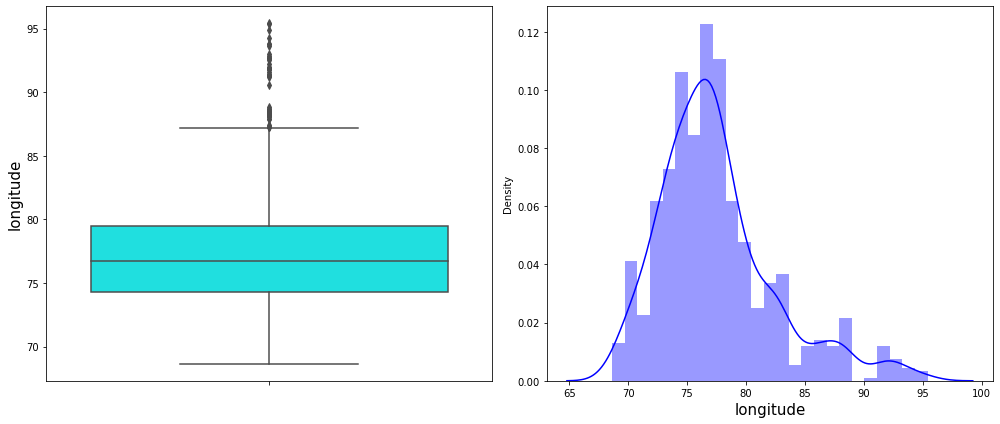

In [9]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='longitude', data=df,color='cyan')
plt.ylabel('longitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['longitude'], color='b')
plt.xlabel('longitude',fontsize=15)
plt.tight_layout()
plt.show()

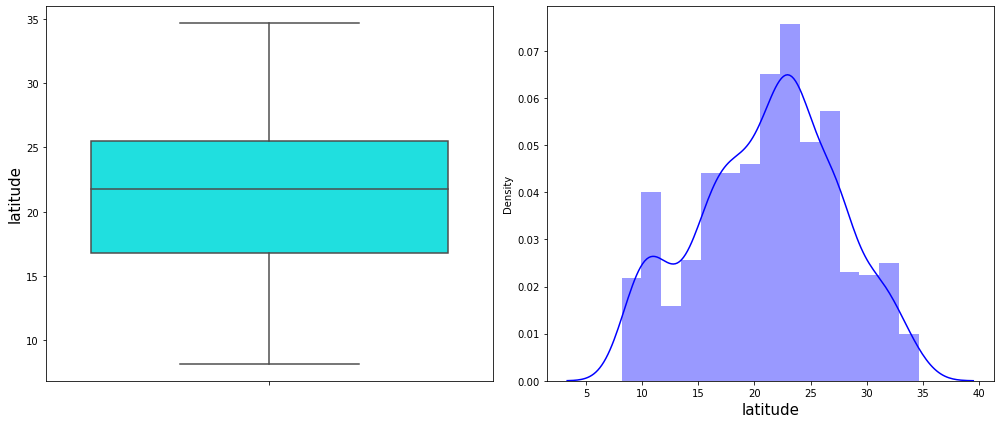

In [10]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='latitude', data=df,color='cyan')
plt.ylabel('latitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['latitude'], color='b')
plt.xlabel('latitude',fontsize=15)
plt.tight_layout()
plt.show()

In [11]:
# Missing Value Imputation of geolocation with mode
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
# Missing Value Imputation of longitude with median
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
# Missing Value Imputation of latitude with mean
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())

In [12]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
generation_gwh_2019                907      100.000000
generation_gwh_2013                907      100.000000
other_fuel1                        709       78.169791
generation_gwh_2014                509       56.119074
generation_gwh_2015                485       53.472988
generation_gwh_2016                473       52.149945
generation_gwh_2017                467       51.488423
generation_gwh_2018                459       50.606395
generation_data_source             458       50.496141
commissioning_year                 380       41.896362
name                                 0        0.000000
capacity_mw                          0        0.000000
source                               0        0.000000
primary_fuel                         0        0.000000
longitude                            0        0.000000
latitude                             0        0.000000
geolocation_source                   0        0.000000


In [13]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
count,907.000000,907.000000,907.000000,527.000000,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0
mean,326.223755,21.197918,77.427103,1997.091082,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN
std,590.085456,6.079148,4.815073,17.082868,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN
min,0.000000,8.168900,68.644700,1927.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.725000,17.072000,74.388900,1988.000000,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN
50%,59.200000,21.281800,76.719500,2001.000000,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN
75%,385.250000,25.176450,79.206100,2012.000000,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN
max,4760.000000,34.649000,95.408000,2018.000000,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN


In [14]:
print('Minimum capacity of Powerplant', df.capacity_mw.min())
print('Maximum capacity of Powerplant', df.capacity_mw.max())

Minimum capacity of Powerplant 0.0
Maximum capacity of Powerplant 4760.0


In [15]:
df.loc[df.capacity_mw == 4760]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
880,VINDH_CHAL STPS,4760.0,24.0983,82.6719,Coal,Oil,2002.0,Central Electricity Authority,WRI,NaN,27594.0,29047.0,30015.0,35116.0,35136.0,NaN,Central Electricity Authority


In [16]:
df.loc[df.capacity_mw == 0]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
829,Tata BP - Electronics City Solar Panel Plant,0.0,12.8491,77.6752,Solar,NaN,NaN,Tata BP Solar India Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


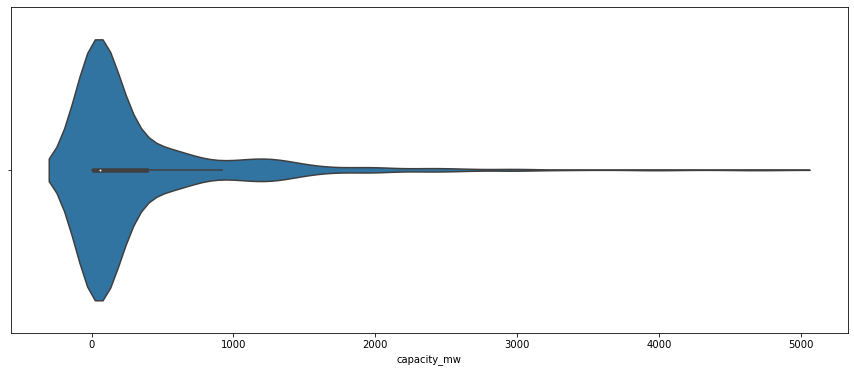

In [17]:
plt.figure(figsize = (15,6))
sns.violinplot(df.capacity_mw)
plt.show()

In [18]:
df.loc[df.capacity_mw >1500].shape

(39, 17)

In [19]:
pd.crosstab(df['capacity_mw'],df["primary_fuel"], margins=True).T.style.background_gradient(cmap='summer_r')


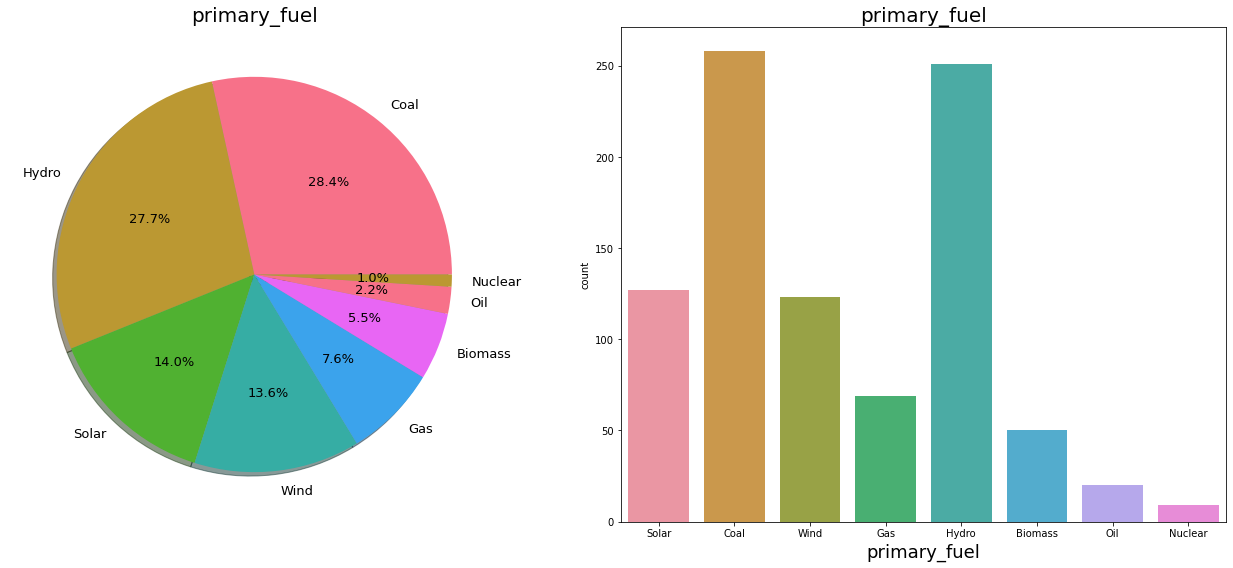

In [20]:
plt.rcParams['figure.autolayout'] = True
sns.set_palette('husl')
f,ax = plt.subplots(1,2, figsize =(18,8))
df['primary_fuel'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={'fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('primary_fuel', fontsize=20)
ax[0].set_ylabel('')
sns.countplot('primary_fuel',data=df,ax=ax[1])
ax[1].set_title('primary_fuel',fontsize=20)
ax[1].set_xlabel("primary_fuel",fontsize=18)
plt.show()


In [21]:
df.primary_fuel.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [22]:
#fint the total capacity of powerplant
print('Total Power Generation Capacity of all Power Plants:',df['capacity_mw'].sum(),'MW')

Total Power Generation Capacity of all Power Plants: 295884.946 MW


In [23]:
#let's check sector wise capacity
df["capacity_mw"].groupby(df["primary_fuel"]).agg([sum])

,sum
primary_fuel,
Biomass,1003.260
Coal,205839.220
Gas,25172.506
Hydro,46441.770
Nuclear,8780.000
Oil,1778.840
Solar,2757.500
Wind,4111.850


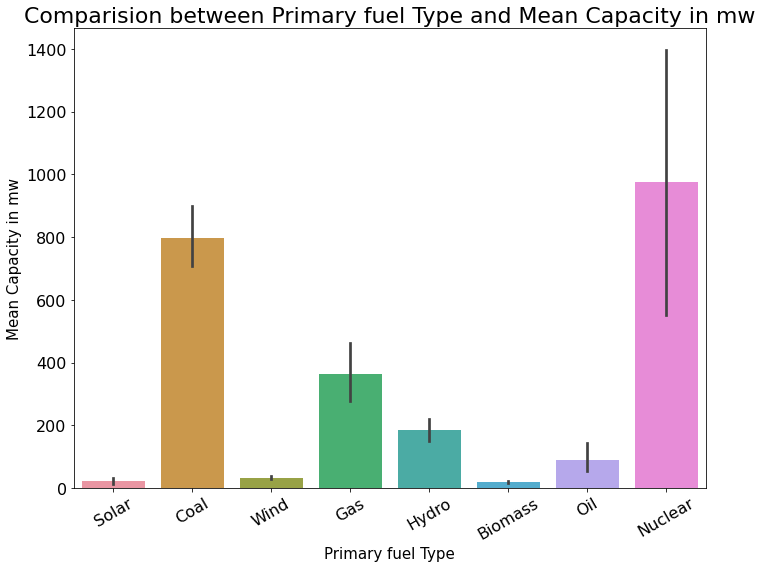

In [24]:
#Lets check the relation between primary_fuel and  Average capacity_mw
plt.figure(figsize = (10,8))
y = df["capacity_mw"]
p = sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.title('Comparision between Primary fuel Type and Mean Capacity in mw', fontsize=22)
p.set_xlabel('Primary fuel Type',fontsize=15)
p.set_ylabel('Mean Capacity in mw',fontsize=15)
plt.xticks(fontsize=16,rotation=30)
plt.yticks(fontsize=16)
plt.show()

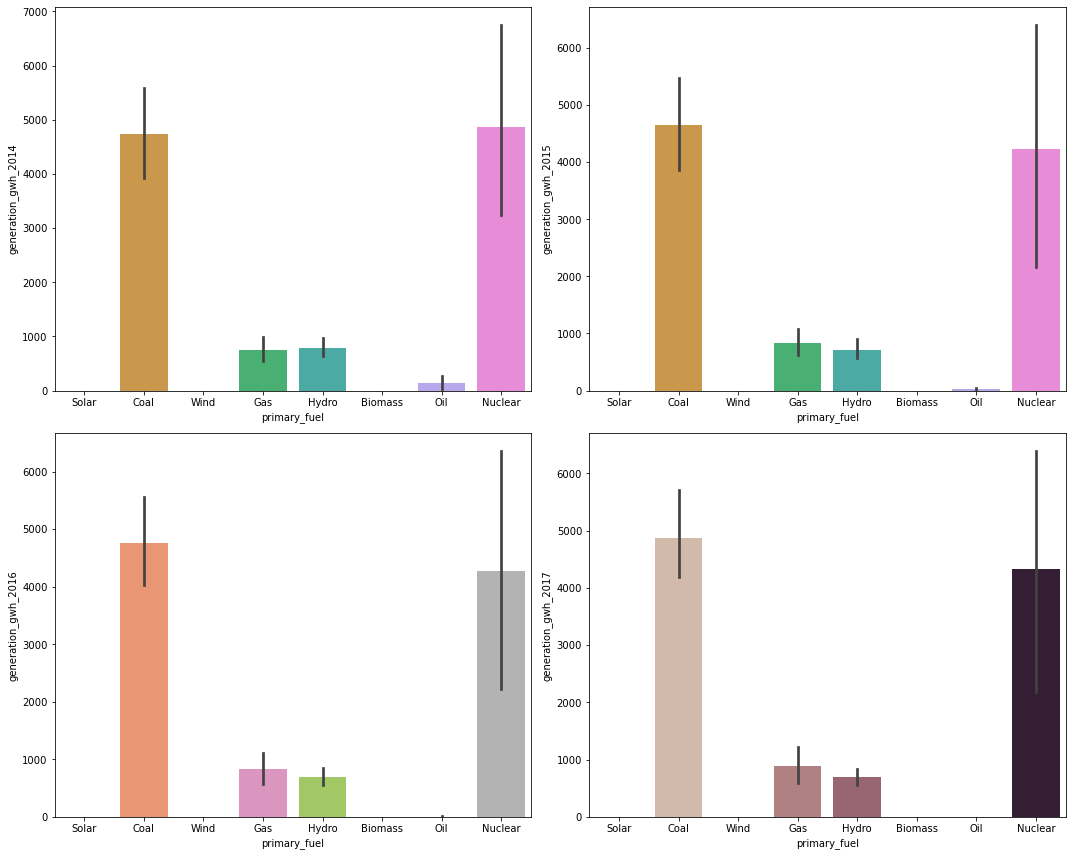

In [25]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2013
sns.barplot(x='primary_fuel',y='generation_gwh_2014',ax=axes[0,0],data=df)

# Checking generation growth in 2014
sns.barplot(x='primary_fuel',y='generation_gwh_2015',ax=axes[0,1],data=df)

# Checking generation growth in 2015
sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[1,0],data=df,palette="Set2")

# Checking generation growth in 2016
sns.barplot(x='primary_fuel',y='generation_gwh_2017',ax=axes[1,1],data=df,palette="ch:.25")
plt.show()

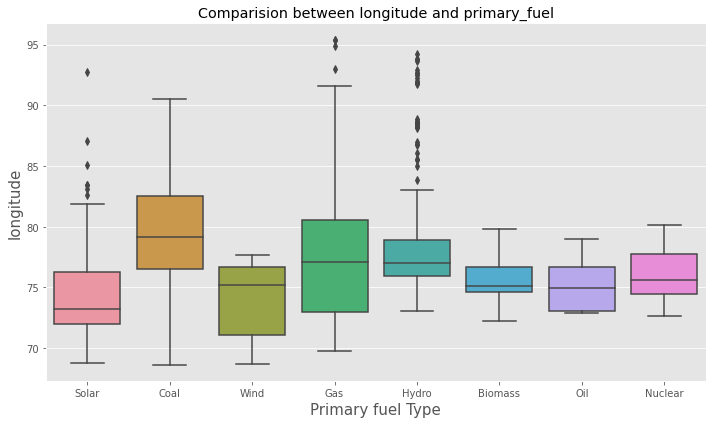

In [26]:
# Let's check how the primary_fuel is reated to longitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')
a = sns.boxplot(df['primary_fuel'],df["longitude"])
a.set_xlabel('Primary fuel Type',fontsize=15)
a.set_ylabel('longitude',fontsize=15)
plt.show()

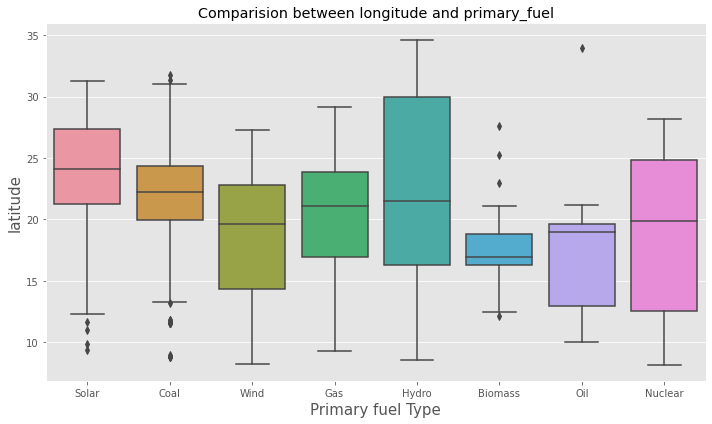

In [27]:
# Let's check how the primary_fuel is reated to Latitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')
a = sns.boxplot(df['primary_fuel'],df["latitude"])
a.set_xlabel('Primary fuel Type',fontsize=15,)
a.set_ylabel('latitude',fontsize=15)
plt.show()

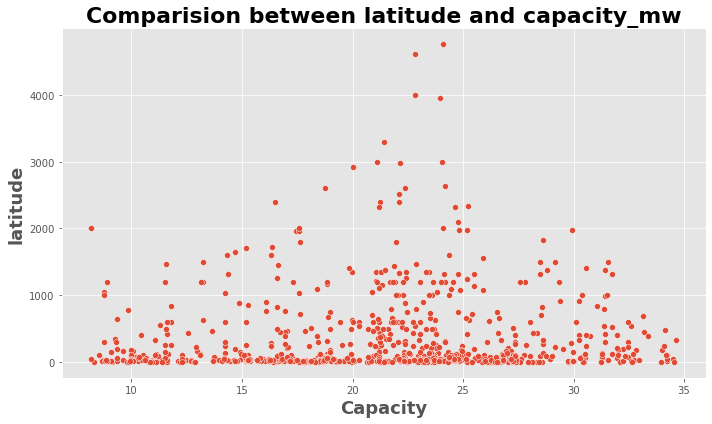

In [28]:
# Let's check how the capacity is reated to latitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw',fontsize=22, fontweight='bold')
a= sns.scatterplot(df['latitude'],df["capacity_mw"])
a.set_xlabel('Capacity',fontsize=18,fontweight ='bold')
a.set_ylabel('latitude',fontsize=18,fontweight ='bold')
plt.show()

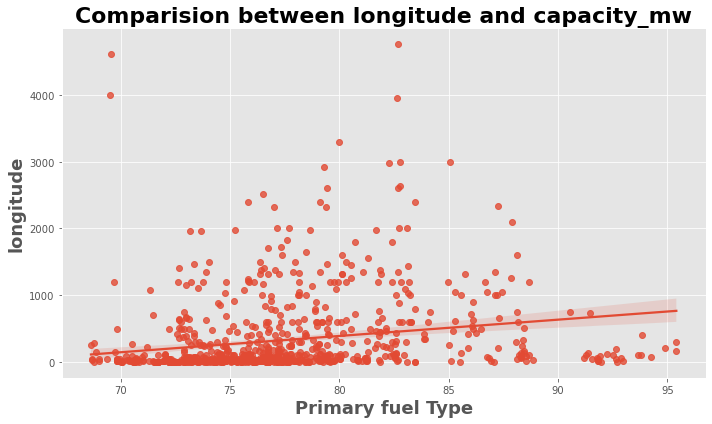

In [29]:
# Let's check how the longitude related to the capacity of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw',fontsize=22, fontweight='bold')
a= sns.regplot(df['longitude'],df["capacity_mw"])
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('longitude',fontsize=18,fontweight ='bold')
plt.show()


In [30]:
# Lets extract power plant age from commissioning year by subtracting it from the year 2018
df['Power_plant_age'] = 2018 - df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)

In [31]:
print('The oldest powerplant Age :',df.Power_plant_age.max())
print('The youngest powerplant Age :',df.Power_plant_age.min())

The oldest powerplant Age : 91.0
The youngest powerplant Age : 0.0


In [32]:
df.loc[df.Power_plant_age==91]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,Power_plant_age
728,SIVASAMUNDRUM,42.0,12.3082,77.165,Hydro,NaN,Central Electricity Authority,WRI,NaN,220.82035,215.3777,144.4143,175.92595,282.76905,NaN,Central Electricity Authority,91.0


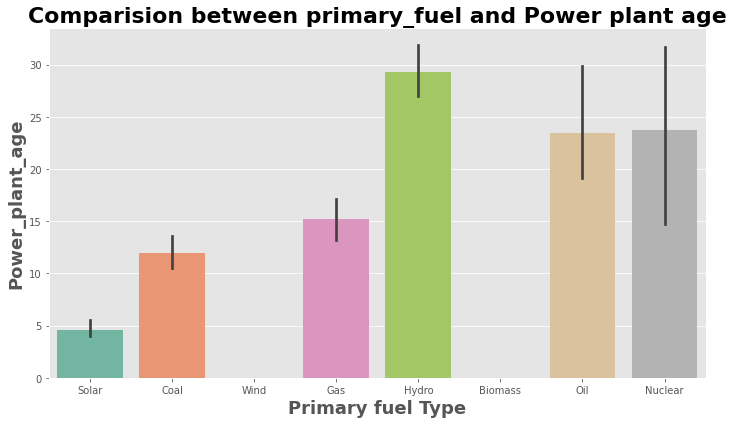

In [33]:
#Lets check how the power plant age affects Fuel Type
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and Power plant age", fontsize=22, fontweight='bold')
a= sns.barplot(x = "primary_fuel", y = "Power_plant_age", data = df,palette="Set2")
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('Power_plant_age',fontsize=18,fontweight ='bold')
plt.show()

<AxesSubplot:title={'center':'Comparision between Power_plant_age and capacity_mw'}, xlabel='Power_plant_age', ylabel='capacity_mw'>

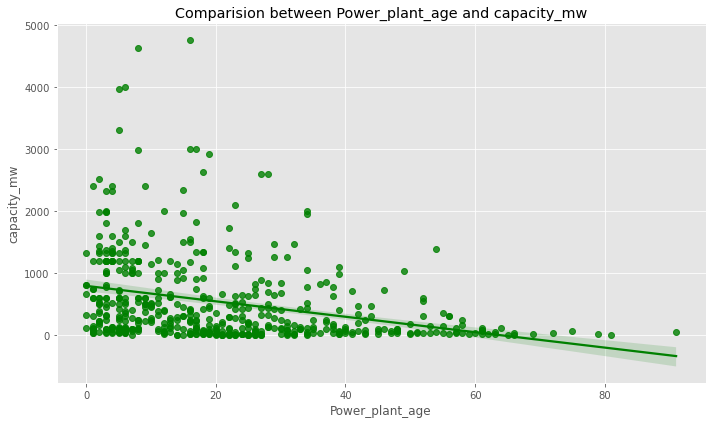

In [34]:
# Let's check how the Power_plant_age affects the capacity of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.regplot(df['Power_plant_age'],df['capacity_mw'],color = "g")

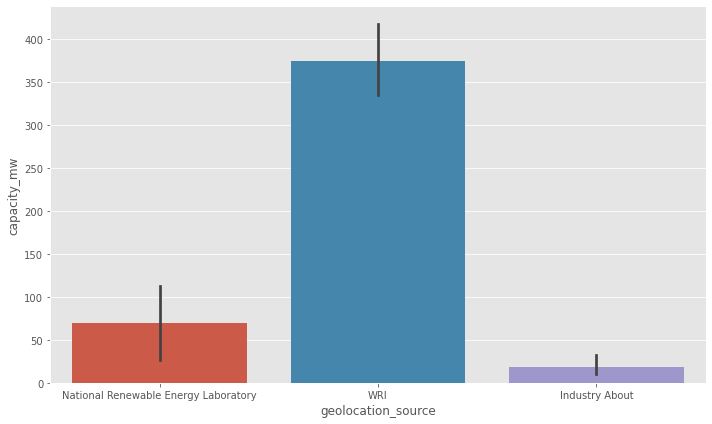

In [35]:
#Lets check the relation between source and capacity_mw
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()

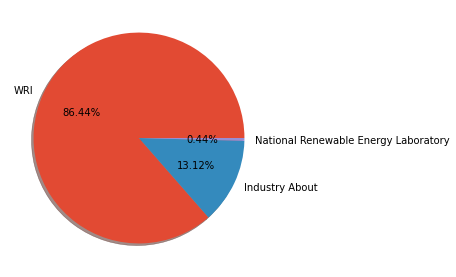

In [36]:
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(6,5))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

In [37]:
Numerical=['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
           'generation_gwh_2016', 'generation_gwh_2017', 'Power_plant_age']

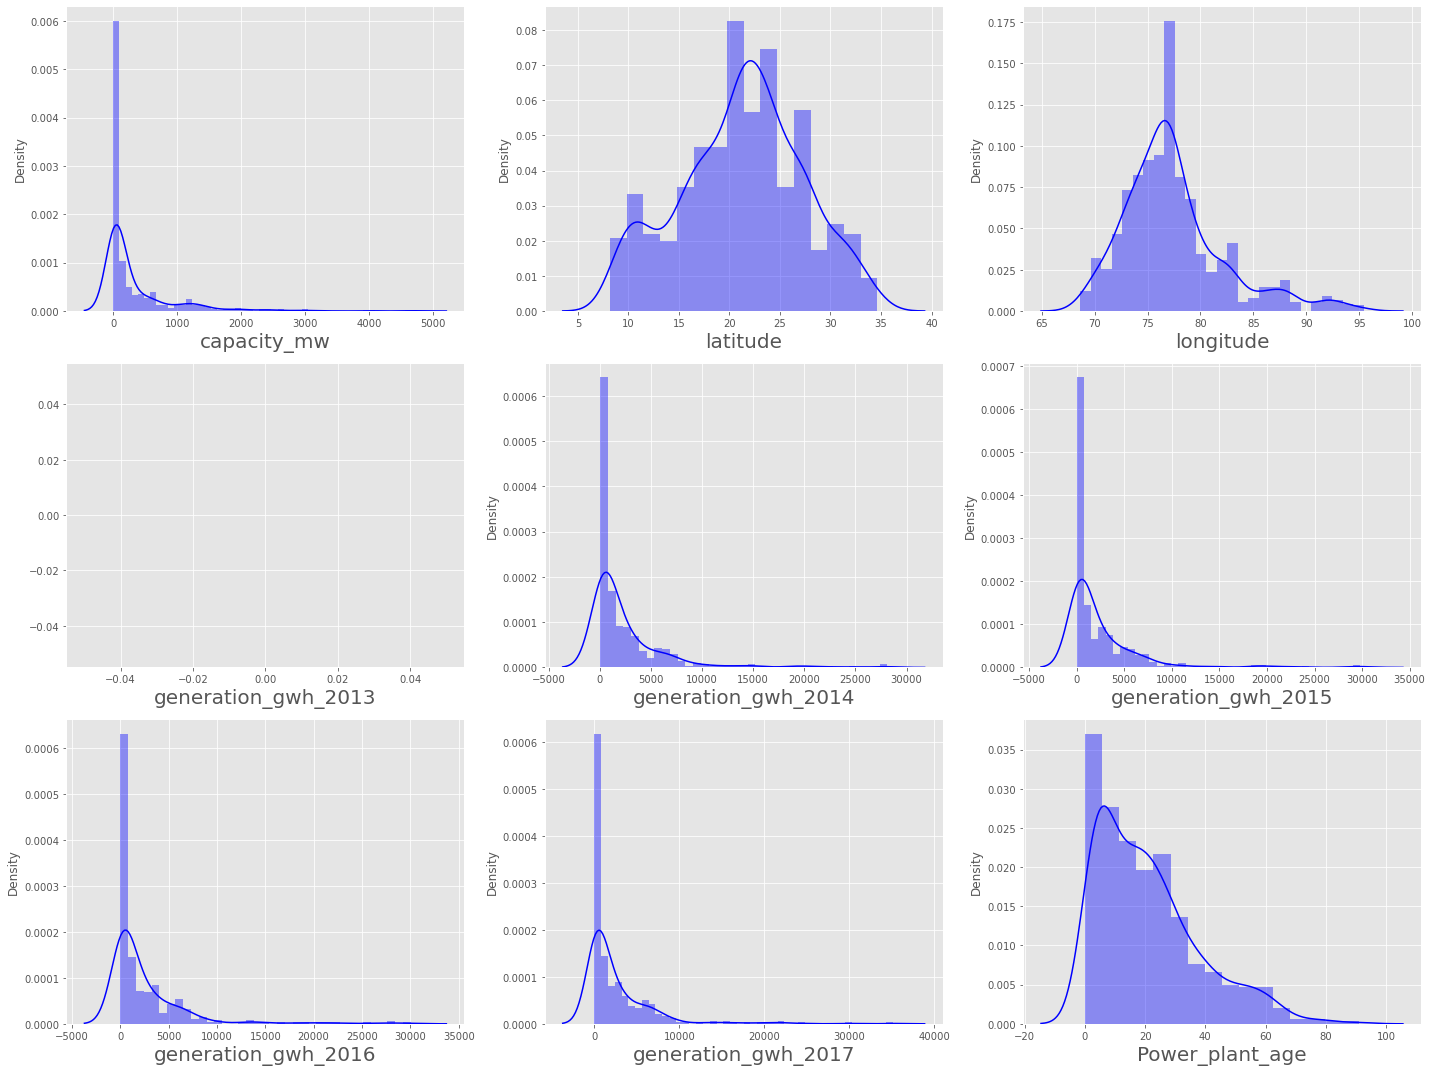

In [38]:
# Checking how the data has been distributed in each column

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

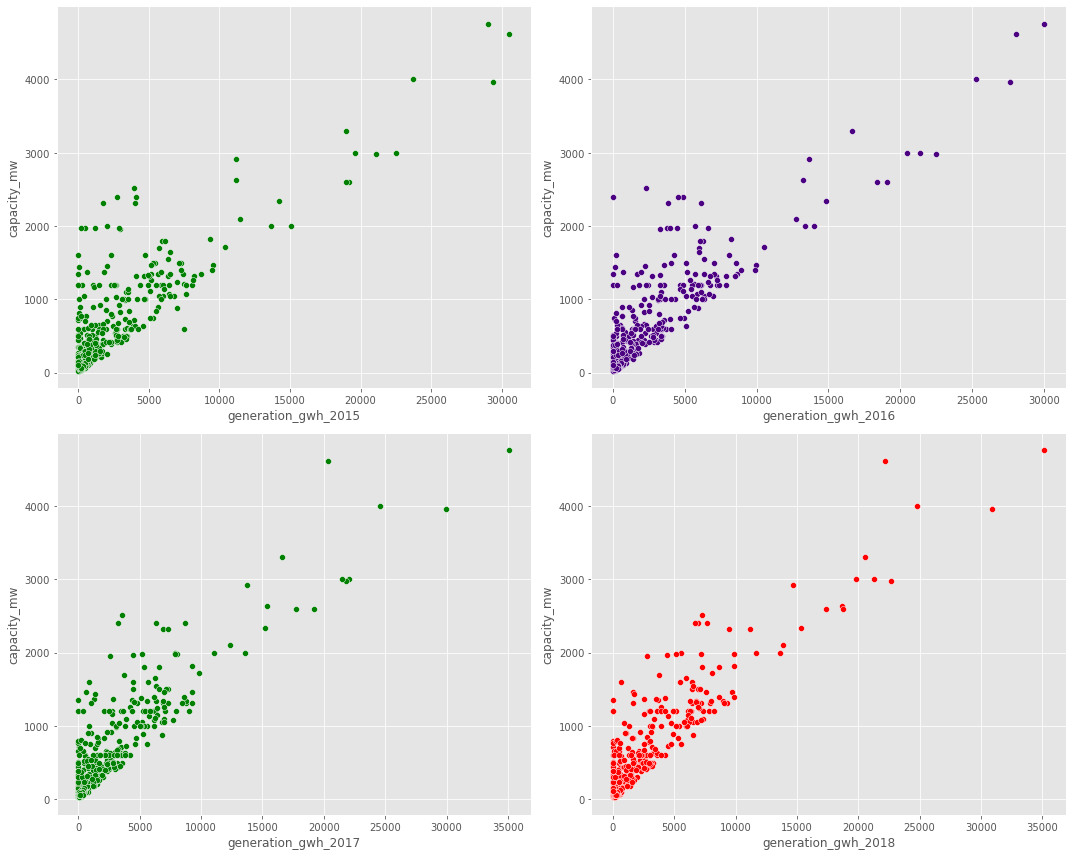

In [39]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2015
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,0],data=df,color="g")

# Checking generation growth in 2016
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[0,1],data=df,color="indigo")

# Checking generation growth in 2017
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,0],data=df,color="g")

# Checking generation growth in 2018
sns.scatterplot(x='generation_gwh_2018',y='capacity_mw',ax=axes[1,1],data=df,color="r")
plt.show()


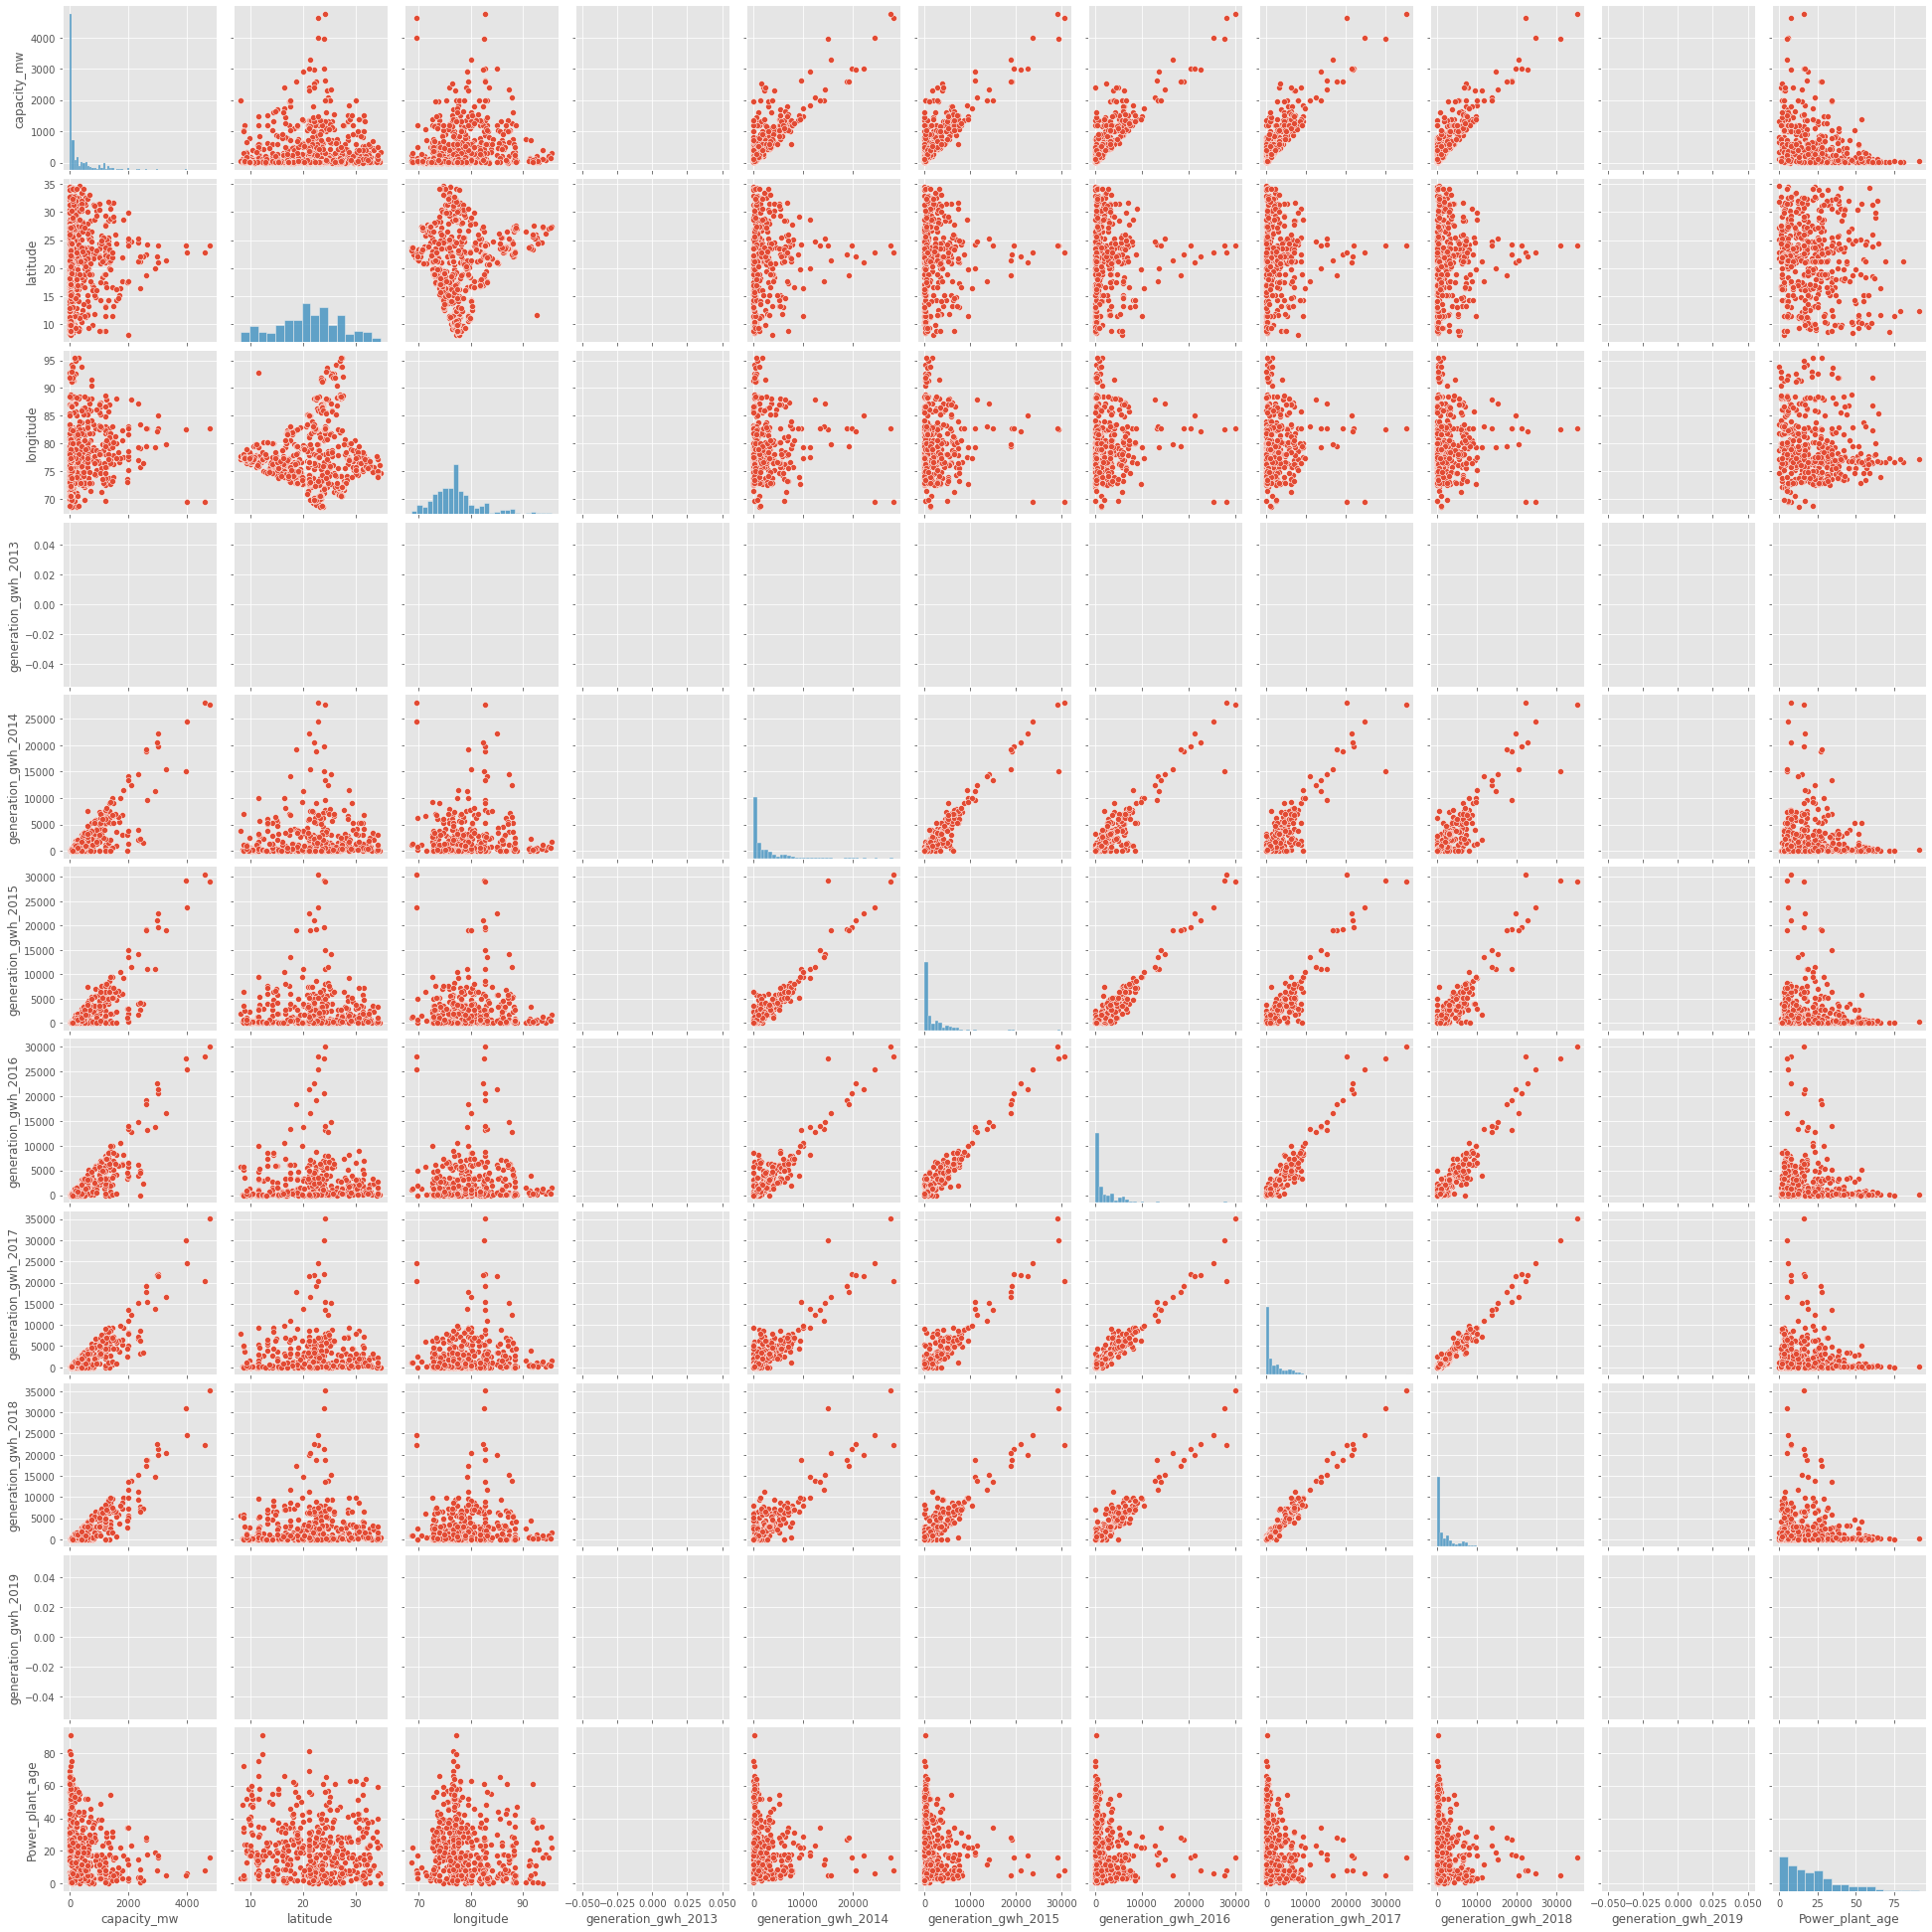

In [40]:
sns.pairplot(df)

In [41]:
df.drop(columns=['name'],axis=1,inplace=True)
df.drop(columns=['generation_data_source'],axis=1,inplace=True)


In [42]:
Category=['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

In [43]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,Power_plant_age
0,2.5,28.1839,73.2407,6,3,109,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
1,98.0,24.7663,74.6090,1,3,174,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,7,3,21,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2,3,22,2,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,14.0
4,1800.0,21.9603,82.4091,1,2,22,2,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,3.0


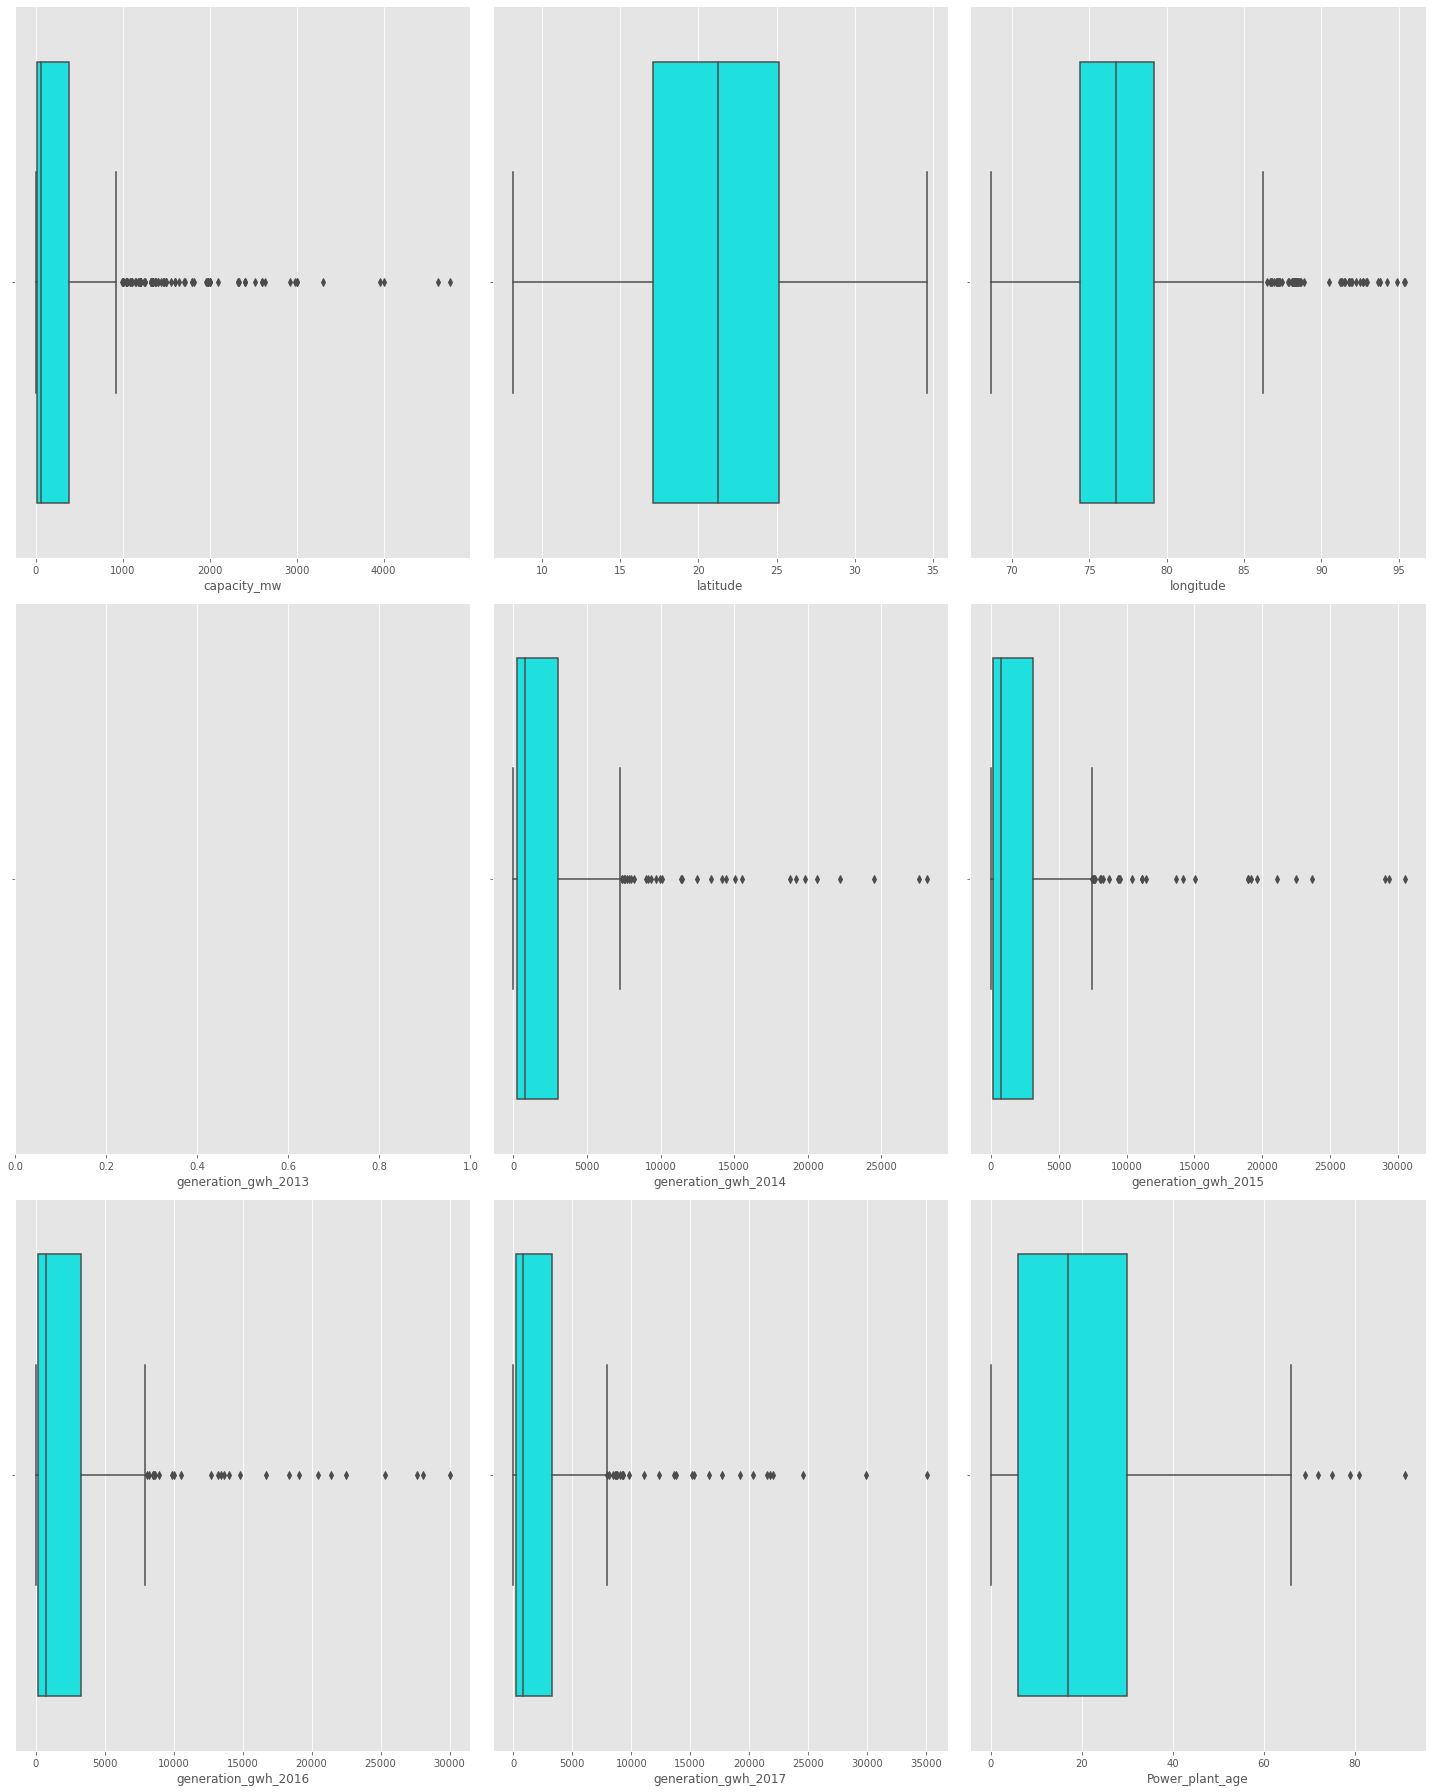

In [44]:
# Identifying the outliers present in numerical columns using boxplot

plt.figure(figsize=(20,25))
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],color='cyan')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()


In [45]:
# Removal of unnessary columns
df.drop(columns=['source','geolocation_source'],axis=1,inplace=True)

In [46]:
df2=df.copy

In [47]:
df3=df.copy()
Q1 = df3.quantile(0)
Q3= df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             720.00000
latitude                 19.19886
longitude                13.30444
primary_fuel              6.00000
other_fuel1               3.00000
generation_gwh_2013           NaN
generation_gwh_2014    5295.18000
generation_gwh_2015    5094.78190
generation_gwh_2016    5246.84405
generation_gwh_2017    5631.03285
generation_gwh_2018    6014.95255
generation_gwh_2019           NaN
Power_plant_age          39.00000
dtype: float64


In [48]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(877, 13)


In [49]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((908-876)/876)*100,'%')

Percentage Data Loss : 3.65296803652968 %


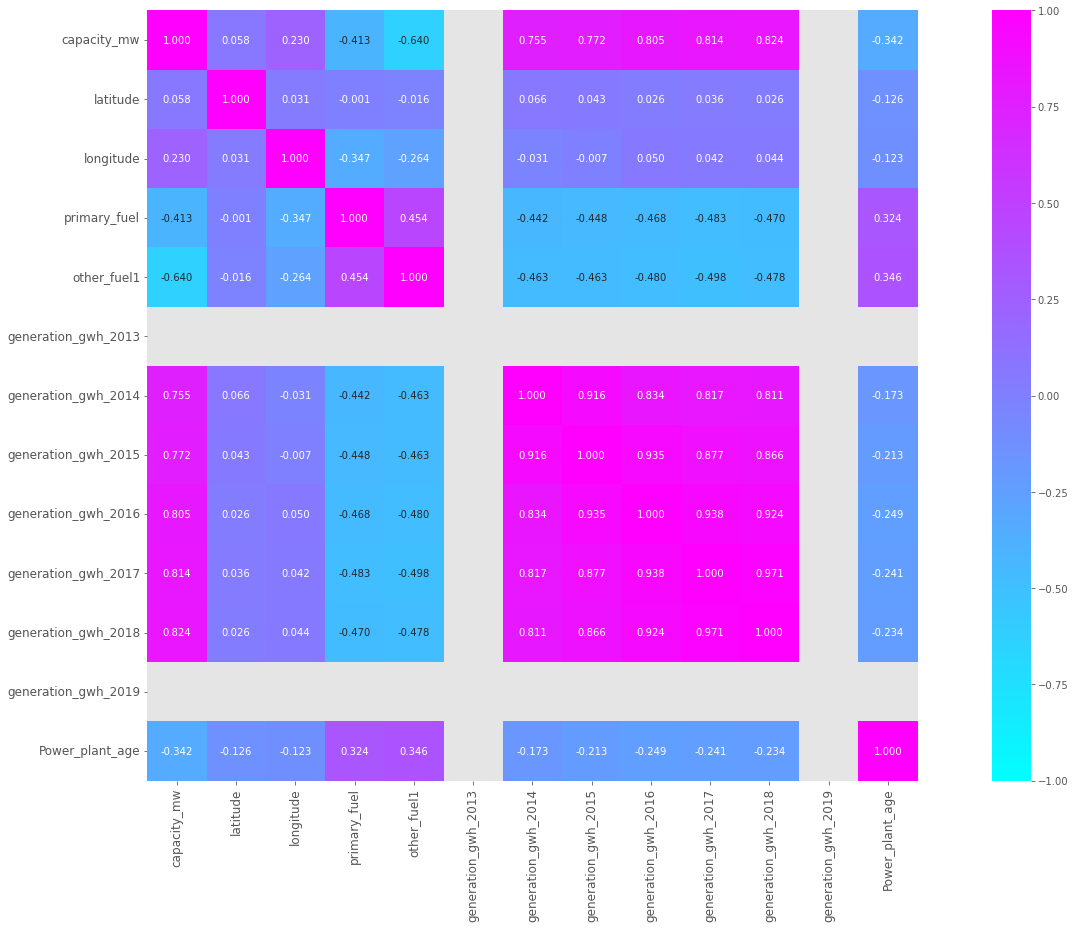

In [50]:
plt.figure(figsize=(21,13))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cool")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

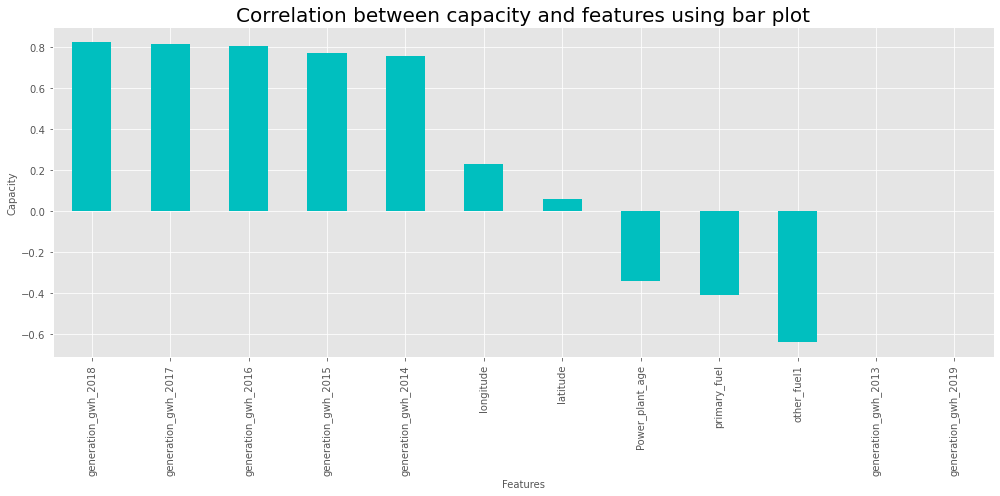

In [51]:
plt.figure(figsize=(14,7))
data.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Capacity',fontsize=10)
plt.title('Correlation between capacity and features using bar plot',fontsize=20)
plt.show()

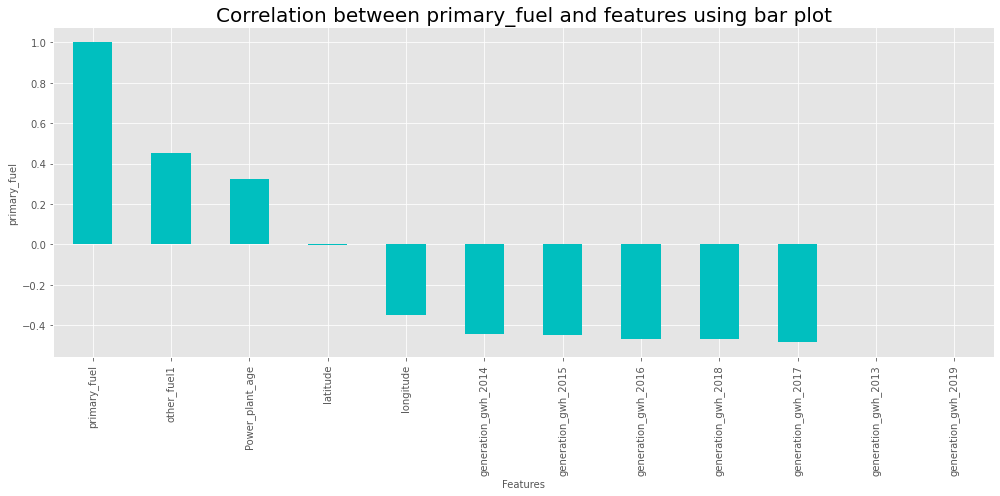

In [52]:
plt.figure(figsize=(14,7))
data.corr()['primary_fuel'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('primary_fuel',fontsize=10)
plt.title('Correlation between primary_fuel and features using bar plot',fontsize=20)
plt.show()

### Skewness

In [53]:
df.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.163320
primary_fuel           0.472251
other_fuel1           -1.626786
generation_gwh_2013         NaN
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
generation_gwh_2019         NaN
Power_plant_age        1.067949
dtype: float64

In [54]:
skew = ['longitude','other_fuel1','generation_gwh_2018','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [55]:
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

,longitude,other_fuel1,generation_gwh_2018,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,-0.933334,0.493934,NaN,NaN,NaN,NaN,NaN,-0.803265
1,-0.516718,0.493934,NaN,NaN,NaN,NaN,NaN,NaN
2,-2.413165,0.493934,NaN,NaN,NaN,NaN,NaN,NaN
3,2.166057,0.493934,-0.071963,-0.115824,0.109529,0.134579,-0.043225,-0.178934
4,1.147361,-2.024155,1.596280,0.916782,1.451544,1.495059,1.348860,-1.370997


In [56]:
data.skew()

capacity_mw            1.945405
latitude              -0.129362
longitude              0.002120
primary_fuel           0.425807
other_fuel1           -1.533254
generation_gwh_2013         NaN
generation_gwh_2014   -0.134464
generation_gwh_2015   -0.142379
generation_gwh_2016   -0.136447
generation_gwh_2017   -0.155373
generation_gwh_2018   -0.158394
generation_gwh_2019         NaN
Power_plant_age       -0.075616
dtype: float64

In [57]:
# We will drop other fuel as result of poor correlation and lot of missing values
data.drop("other_fuel1",axis=1,inplace=True)

In [58]:
# Missing Value Imputation of latitude with mean
data['Power_plant_age'] = data['Power_plant_age'].fillna(data['Power_plant_age'].mean())

In [59]:
data.drop("generation_gwh_2013",axis=1,inplace=True)
data.drop("generation_gwh_2014",axis=1,inplace=True)
data.drop("generation_gwh_2015",axis=1,inplace=True)
data.drop("generation_gwh_2016",axis=1,inplace=True)
data.drop("generation_gwh_2017",axis=1,inplace=True)
data.drop("generation_gwh_2018",axis=1,inplace=True)
data.drop("generation_gwh_2019",axis=1,inplace=True)

## Machine Learning for model building

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [61]:
# Splitting data in target and dependent feature
X = data.drop(['primary_fuel'], axis =1)
Y = data['primary_fuel']

In [62]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (613, 4)
Training target vector size: (613,)
Test feature matrix size: (264, 4)
Test target vector size: (264,)


In [64]:
#Finding Best Random state
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.6098484848484849 on Random_state 517


In [65]:
#Logistic Reggression

X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('Logistics Regression Evaluation')
print('\n')
print('Accuracy Score of Logistics Regression :', accuracy_score(Y_test, y_pred))
print('\n')
print('Confusion matrix of Logistics Regression :\n',confusion_matrix(Y_test, y_pred))
print('\n')
print('classification Report of Logistics Regression',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.48863636363636365


Confusion matrix of Logistics Regression :
 [[ 0  0  0  1  0  0  1 10]
 [ 0 43  0 20  0  0  3  3]
 [ 0  8  0  7  0  0  0  3]
 [ 0 21  0 43  0  0  0  8]
 [ 0  2  0  2  0  0  0  0]
 [ 0  0  0  3  0  0  0  2]
 [ 0  0  0  9  0  0 23  8]
 [ 0  1  0  8  0  0 15 20]]


classification Report of Logistics Regression               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.57      0.62      0.60        69
           2       0.00      0.00      0.00        18
           3       0.46      0.60      0.52        72
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         5
           6       0.55      0.57      0.56        40
           7       0.37      0.45      0.41        44

    accuracy                           0.49       264
   macro avg       0.24      0.28      0.26       26

In [66]:
#Decision Tree Classifier
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('DecisionTreeClassifier Evaluation')
print('\n')
print('Accuracy Score of DecisionTreeClassifier :', accuracy_score(Y_test, y_pred))
print('\n')
print('Confusion matrix of DecisionTreeClassifier :\n',confusion_matrix(Y_test, y_pred))
print('\n')
print('classification Report of DecisionTreeClassifier \n',classification_report(Y_test, y_pred))

DecisionTreeClassifier Evaluation


Accuracy Score of DecisionTreeClassifier : 0.678030303030303


Confusion matrix of DecisionTreeClassifier :
 [[ 7  2  0  0  0  0  1  2]
 [ 0 43  7 12  0  2  4  1]
 [ 0  3  5  7  0  2  0  1]
 [ 0  6  5 61  0  0  0  0]
 [ 0  2  1  1  0  0  0  0]
 [ 0  1  1  2  0  1  0  0]
 [ 2  3  0  0  0  0 33  2]
 [ 1  2  1  0  0  0 11 29]]


classification Report of DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.69      0.62      0.66        69
           2       0.25      0.28      0.26        18
           3       0.73      0.85      0.79        72
           4       0.00      0.00      0.00         4
           5       0.20      0.20      0.20         5
           6       0.67      0.82      0.74        40
           7       0.83      0.66      0.73        44

    accuracy                           0.68       264
   macro avg       0.51      0.50      0.50 

In [67]:
#Random Forest Classifier

X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('RandomForestClassifier Evaluation')
print('\n')
print('Accuracy Score of RandomForestClassifier :', accuracy_score(Y_test, y_pred))
print('\n')
print('Confusion matrix of RandomForestClassifier : \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('classification Report of RandomForestClassifier \n',classification_report(Y_test, y_pred))

RandomForestClassifier Evaluation


Accuracy Score of RandomForestClassifier : 0.7386363636363636


Confusion matrix of RandomForestClassifier : 
 [[ 8  3  0  0  0  0  1  0]
 [ 2 52  4  7  1  1  0  2]
 [ 0  4  7  5  0  1  0  1]
 [ 0  6  2 62  0  1  0  1]
 [ 0  2  1  1  0  0  0  0]
 [ 0  1  0  2  0  2  0  0]
 [ 0  3  0  0  0  0 32  5]
 [ 2  2  0  0  0  0  8 32]]


classification Report of RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       0.71      0.75      0.73        69
           2       0.50      0.39      0.44        18
           3       0.81      0.86      0.83        72
           4       0.00      0.00      0.00         4
           5       0.40      0.40      0.40         5
           6       0.78      0.80      0.79        40
           7       0.78      0.73      0.75        44

    accuracy                           0.74       264
   macro avg       0.58      0.57      0.5

In [68]:
#Extra Tree Classifier
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
etc=ExtraTreesClassifier()
etc.fit(X_train,Y_train)
y_pred=etc.predict(X_test)
print('ExtraTreesClassifier Evaluation')
print('\n')
print('Accuracy Score of ExtraTreesClassifier :', accuracy_score(Y_test, y_pred))
print('\n')
print('Confusion matrix of ExtraTreesClassifier :\n',confusion_matrix(Y_test, y_pred))
print('\n')
print('classification Report of ExtraTreesClassifier \n',classification_report(Y_test, y_pred))

ExtraTreesClassifier Evaluation


Accuracy Score of ExtraTreesClassifier : 0.7537878787878788


Confusion matrix of ExtraTreesClassifier :
 [[ 8  2  1  0  0  0  1  0]
 [ 0 52  8  7  0  1  0  1]
 [ 0  3 12  2  0  1  0  0]
 [ 0  8  3 60  0  0  0  1]
 [ 0  3  0  1  0  0  0  0]
 [ 0  1  0  3  0  1  0  0]
 [ 5  2  1  0  0  0 32  0]
 [ 3  1  0  0  0  0  6 34]]


classification Report of ExtraTreesClassifier 
               precision    recall  f1-score   support

           0       0.50      0.67      0.57        12
           1       0.72      0.75      0.74        69
           2       0.48      0.67      0.56        18
           3       0.82      0.83      0.83        72
           4       0.00      0.00      0.00         4
           5       0.33      0.20      0.25         5
           6       0.82      0.80      0.81        40
           7       0.94      0.77      0.85        44

    accuracy                           0.75       264
   macro avg       0.58      0.59      0.58       2

In [69]:
# Cross Validation
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
       DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('Cross Validation Score', m, ':')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')




Cross Validation Score LogisticRegression() :
Score : [0.55681818 0.48295455 0.51428571 0.53142857 0.51428571]
Mean Score : 0.5199545454545454
Std deviation : 0.024182027423871873




Cross Validation Score DecisionTreeClassifier() :
Score : [0.71022727 0.65340909 0.73714286 0.73714286 0.64571429]
Mean Score : 0.6967272727272726
Std deviation : 0.03981928840983146




Cross Validation Score RandomForestClassifier() :
Score : [0.75568182 0.77272727 0.8        0.76571429 0.73714286]
Mean Score : 0.7662532467532467
Std deviation : 0.020689208449433883




Cross Validation Score ExtraTreesClassifier() :
Score : [0.75       0.78977273 0.78857143 0.78285714 0.77142857]
Mean Score : 0.776525974025974
Std deviation : 0.014766610693198344




### GridSearchCV

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}


In [72]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=5)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.724 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.683 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.537 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.672 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.648 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=0.650 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=0.618 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, ma

[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=70;, score=0.642 total time=   0.1s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=70;, score=0.650 total time=   0.1s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=70;, score=0.672 total time=   0.1s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=70;, score=0.713 total time=   0.1s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=5;, score=0.675 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=5;, score=0.715 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=5;, score=0.634 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=5;, score=0.738 total time=

[CV 2/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=60;, score=0.715 total time=   0.1s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=60;, score=0.699 total time=   0.1s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=60;, score=0.738 total time=   0.1s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=60;, score=0.738 total time=   0.1s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=70;, score=0.740 total time=   0.1s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=70;, score=0.707 total time=   0.1s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=70;, score=0.724 total time=   0.1s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=70;, score=0.730 tot

[CV 3/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=50;, score=0.683 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=50;, score=0.738 total time=   0.1s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=50;, score=0.697 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=60;, score=0.740 total time=   0.1s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=60;, score=0.715 total time=   0.1s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=60;, score=0.691 total time=   0.1s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=60;, score=0.754 total time=   0.1s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=60;, score=0.697 tot

[CV 5/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=25;, score=0.705 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=50;, score=0.732 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=50;, score=0.724 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=50;, score=0.691 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=50;, score=0.738 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=50;, score=0.730 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=60;, score=0.772 total time=   0.1s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=60;, score=0.707 tot

[CV 3/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25;, score=0.691 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25;, score=0.738 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25;, score=0.680 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=50;, score=0.724 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=50;, score=0.740 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=50;, score=0.691 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=50;, score=0.754 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=50;, score=0.762 tot

[CV 5/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15;, score=0.713 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25;, score=0.772 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25;, score=0.740 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25;, score=0.724 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25;, score=0.746 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25;, score=0.705 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=50;, score=0.732 total time=   0.1s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=50;, score=0.724 tot

[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15;, score=0.675 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15;, score=0.713 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15;, score=0.746 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25;, score=0.699 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25;, score=0.650 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25;, score=0.650 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25;, score=0.713 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25;,

[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=10;, score=0.675 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=10;, score=0.721 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=10;, score=0.754 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15;, score=0.740 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15;, score=0.724 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15;, score=0.699 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15;, score=0.738 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimat

[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=10;, score=0.683 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=10;, score=0.754 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=10;, score=0.680 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15;, score=0.732 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15;, score=0.740 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15;, score=0.715 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15;, score=0.754 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimat

[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=10;, score=0.699 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=10;, score=0.779 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=10;, score=0.664 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=15;, score=0.715 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=15;, score=0.756 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=15;, score=0.707 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=15;, score=0.746 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimat

[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=0.724 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=0.697 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=0.705 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=15;, score=0.732 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=15;, score=0.764 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=15;, score=0.732 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=15;, score=0.754 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimat

[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10;, score=0.675 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10;, score=0.730 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10;, score=0.680 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=15;, score=0.764 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=15;, score=0.707 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=15;, score=0.675 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=15;, score=0.721 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimat

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=5)

In [73]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 'log2',
 'n_estimators': 25}

In [74]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators=60, max_depth=50 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.7613636363636364


In [75]:
from sklearn.metrics import roc_auc_score
y_prob = Final_mod.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.893700 (macro),
0.909396 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.906454 (macro),
0.943429 (weighted by prevalence)


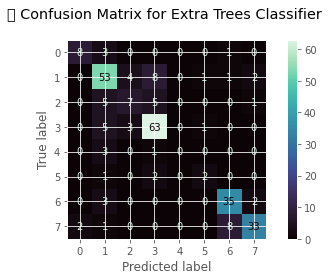

In [76]:
from sklearn import metrics
class_names = df.columns
metrics.plot_confusion_matrix(Final_mod, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Extra Trees Classifier \n')
plt.show()